Classifying the Iris Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [3]:
# Load the Iris dataset
iris = load_iris()

In [5]:
# Convert the data into a DataFrame
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

df['target'] = iris['target']

# Now you can use head() to see the first few rows of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [6]:

# Now let's separate features (X) and target (y)
X = df.drop('target', axis=1)  # Features (all columns except 'target')
y = df['target']  # Target (species)

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Define the range of k values to test
k_values = np.arange(2, 21)

In [23]:
# Set up the KNN model and GridSearchCV
param_grid = {'n_neighbors': k_values}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [ ]:
# Perform grid searchl sur les voisiins la meilleur valeur may be
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
             scoring='accuracy')

In [25]:
# Get the best value of n_neighbors
best_k = grid_search.best_params_['n_neighbors']
print("Best value for n_neighbors:", best_k)

Best value for n_neighbors: 7


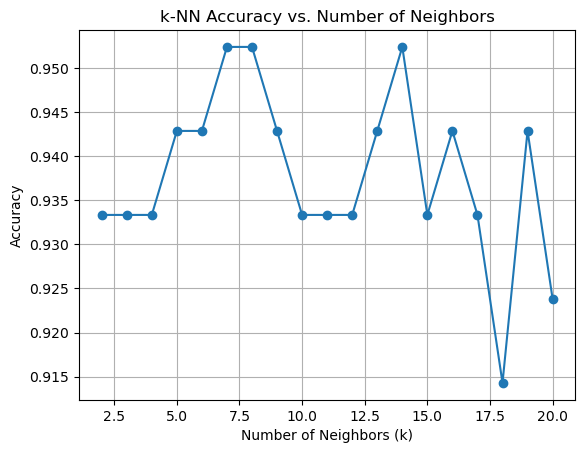

In [26]:
# Plot the results
results = grid_search.cv_results_
mean_scores = results['mean_test_score']

plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

In [28]:
# Evaluate the model with the optimal k on the test set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))

Accuracy on test set: 1.0
